# Chuẩn bị dữ liệu

In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style;
import seaborn as sns
import re
style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/DataMining/drug+review+dataset+drugs+com.zip

Archive:  /content/drive/MyDrive/DataMining/drug+review+dataset+drugs+com.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [4]:
# read csv
test = pd.read_csv('/content/drugsComTest_raw.tsv',  sep='\t'  )
train = pd.read_csv('/content/drugsComTrain_raw.tsv', sep='\t')

In [ ]:
print("Shape of training dataset:", train.shape)
train.head()


Shape of training dataset: (161297, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
print("Shape of testing dataset:", test.shape)
test.head()

Shape of testing dataset: (53766, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


# Quan sát dữ liệu

In [8]:
# From the above two ouputs we can see that both the dataset contains same columns, we can combine them for better analysis

data = pd.concat([train, test])
print("Shape of dataset after combining both train & test:", data.shape)
# data.head()

Shape of dataset after combining both train & test: (215063, 7)


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,215063.0,116039.364814,67007.913366,0.0,58115.5,115867.0,173963.5,232291.0
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [ ]:
num = len(data['drugName'].unique().tolist())
print('We number of Drugs are -',num )

We number of Drugs are - 3671


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [ ]:
data.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [ ]:
data.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [ ]:
data.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [ ]:
data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    160613
0.0     53256
Name: Review_Sentiment, dtype: int64

# Minh họa dữ liệu

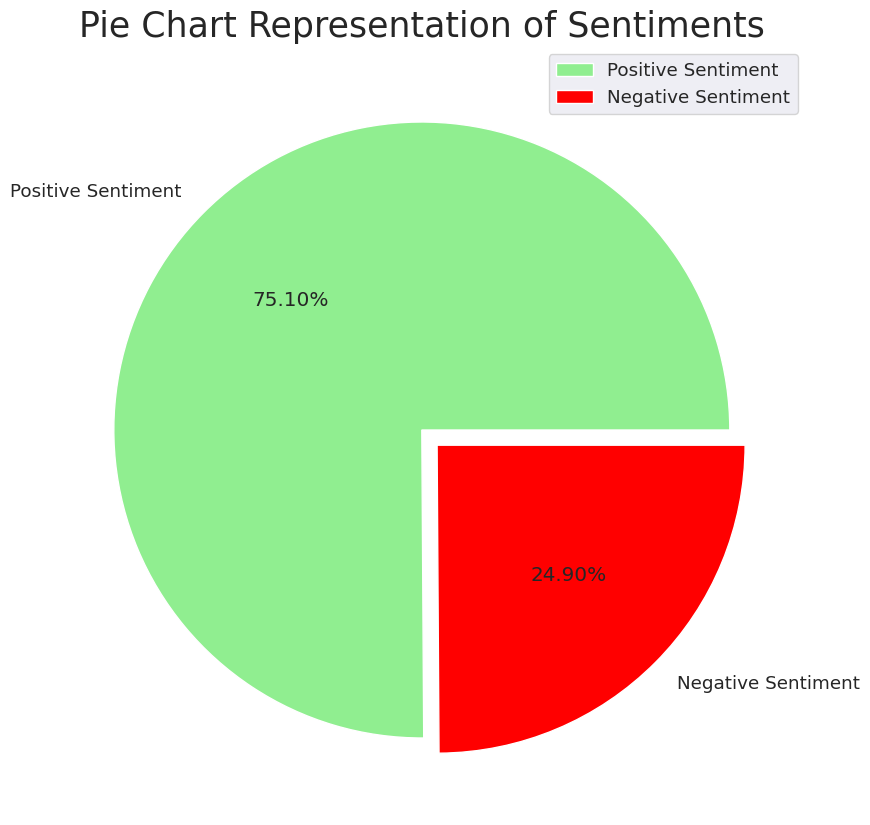

In [ ]:
size = [160613, 53256]
colors = ['lightgreen', 'red']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

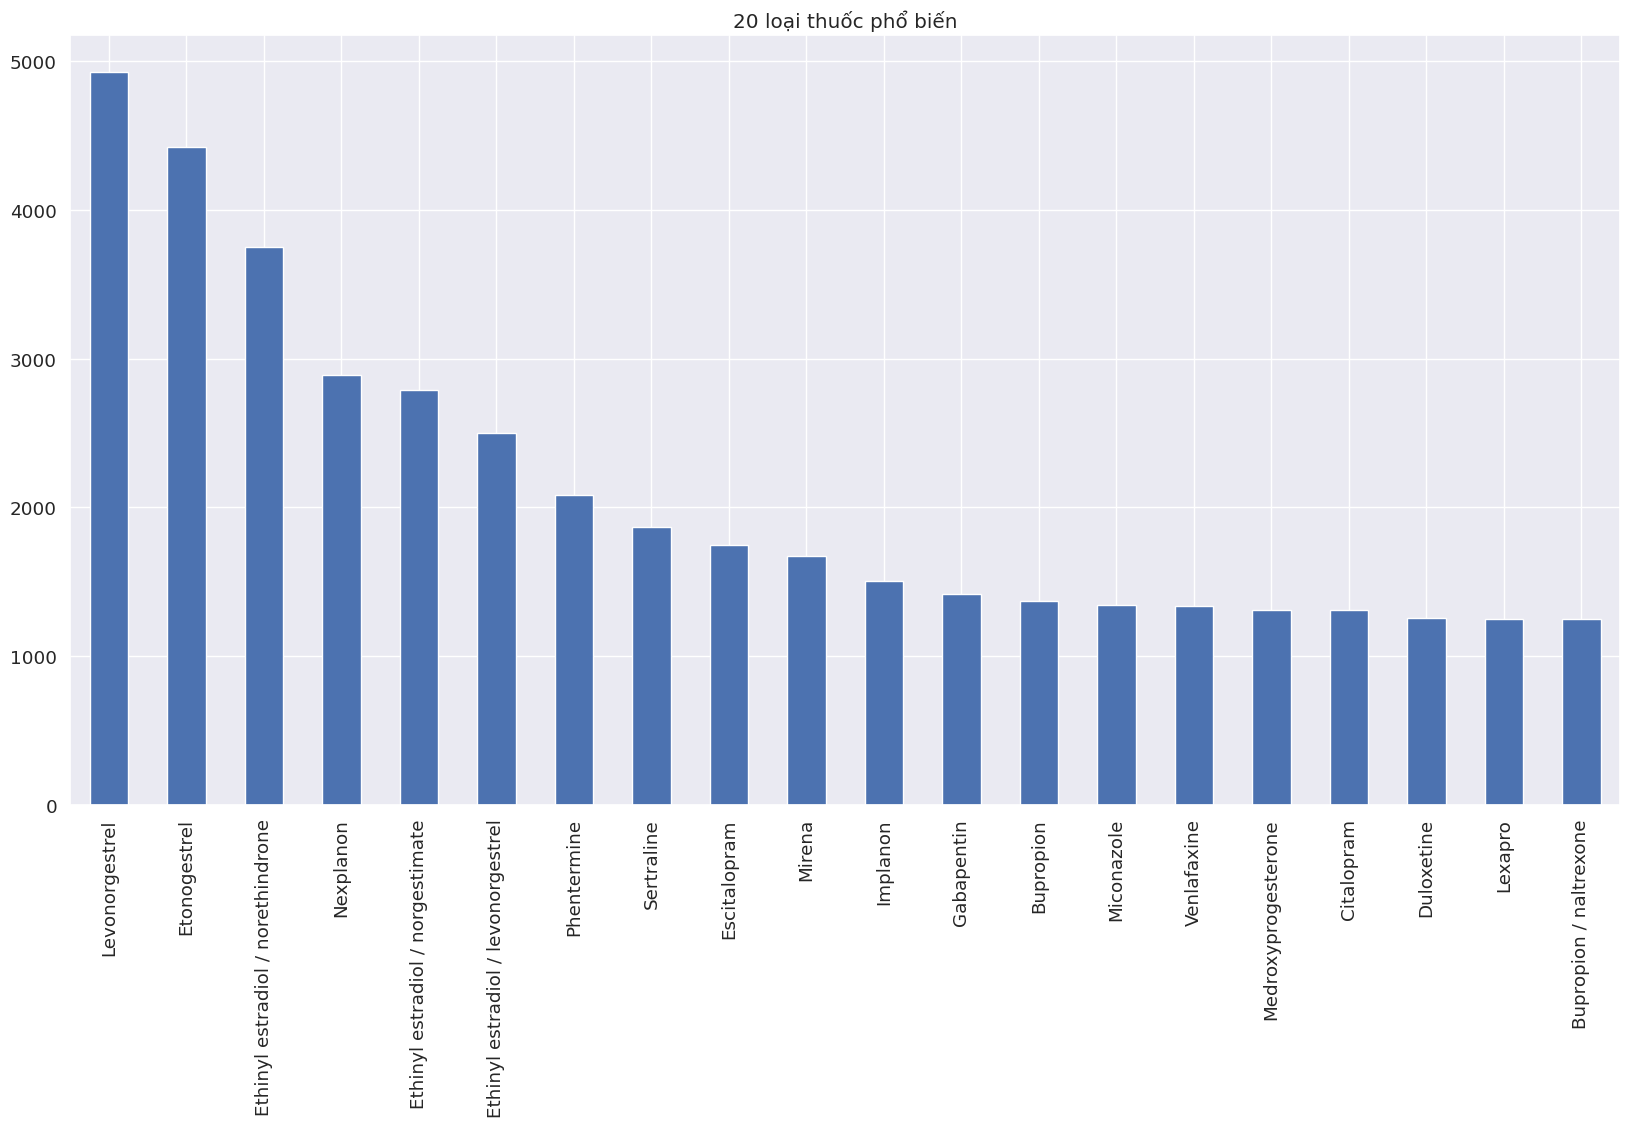

In [ ]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
data['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("20 loại thuốc phổ biến")
plt.show()

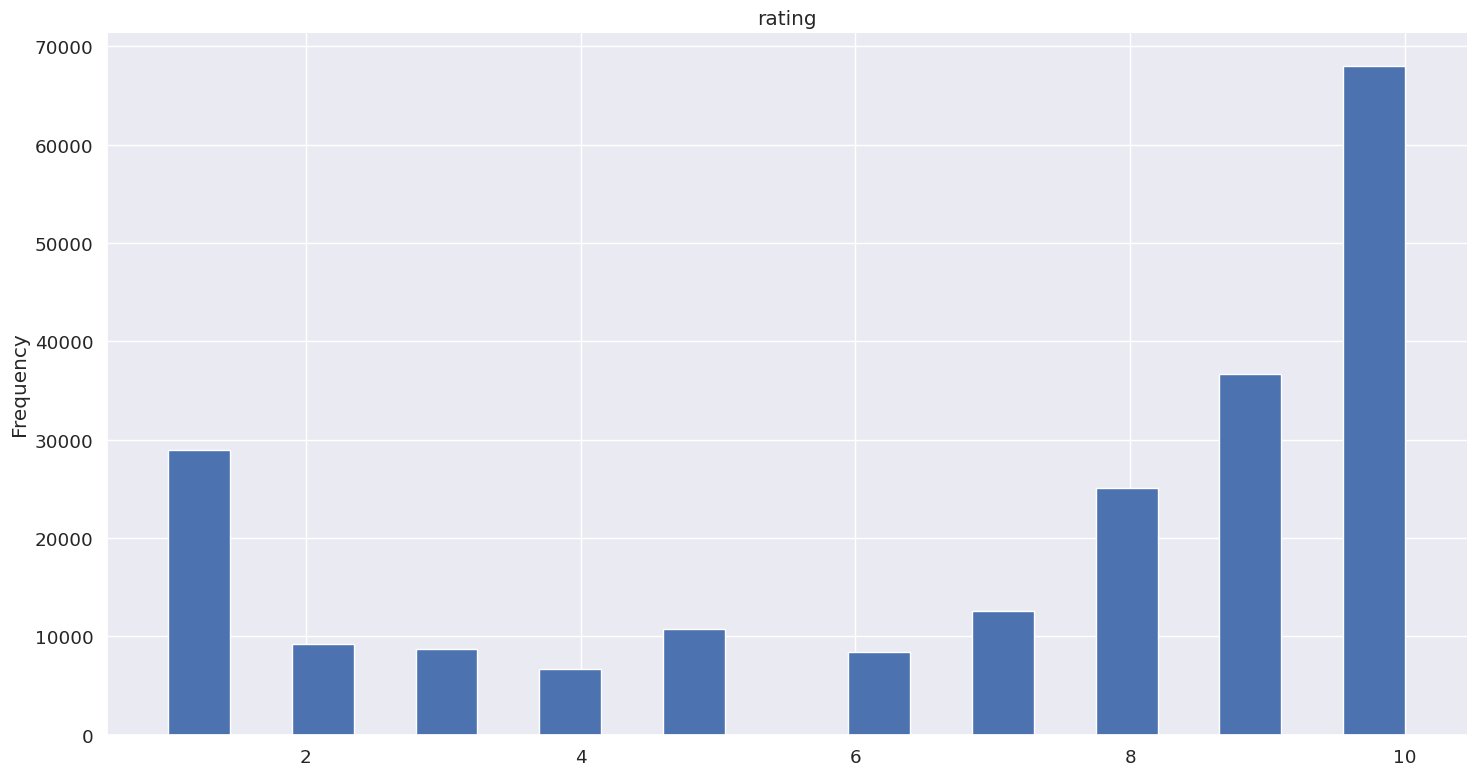

In [ ]:
from matplotlib import pyplot as plt
data['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

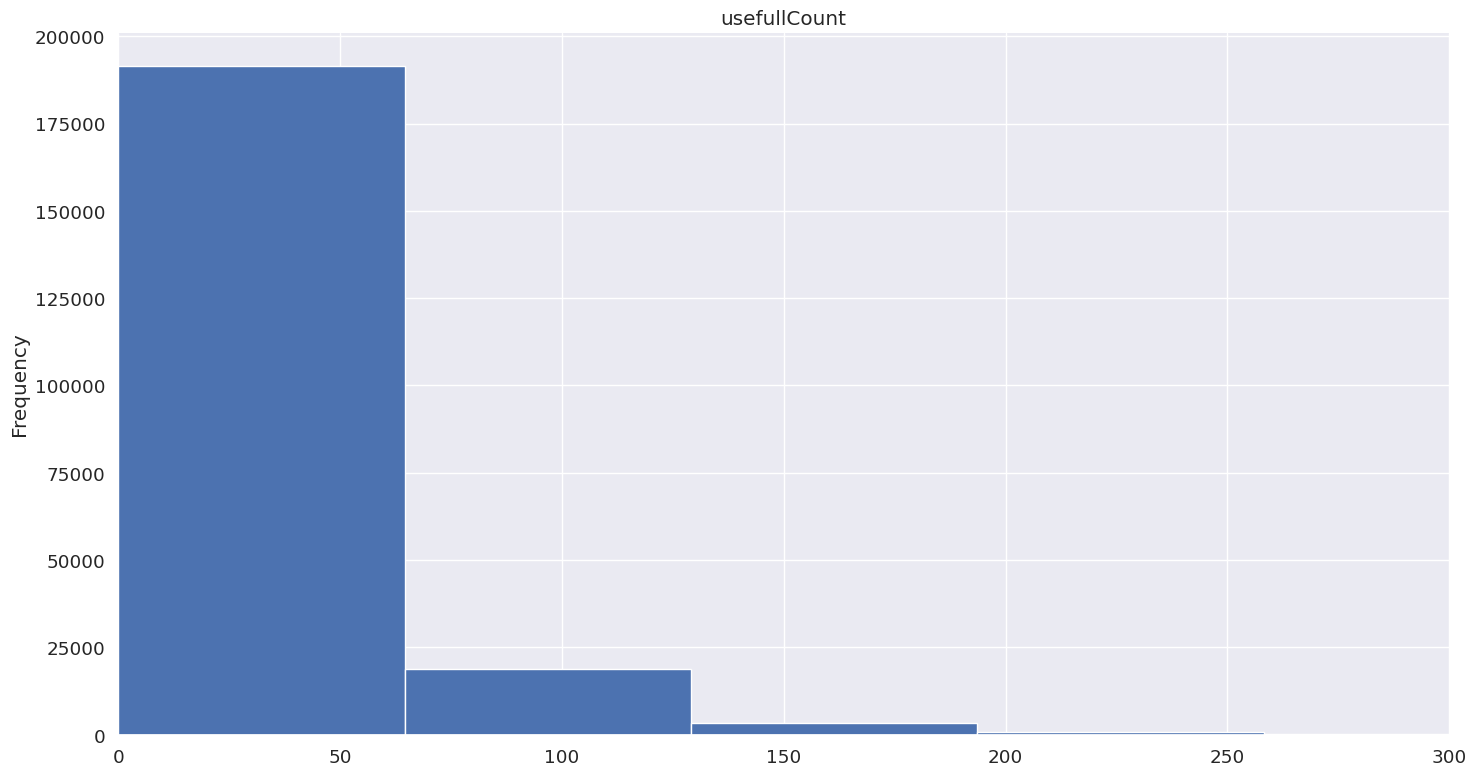

In [ ]:
from matplotlib import pyplot as plt
data['usefulCount'].plot(kind='hist', bins=20, title='usefullCount')
plt.xlim(0, 300)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

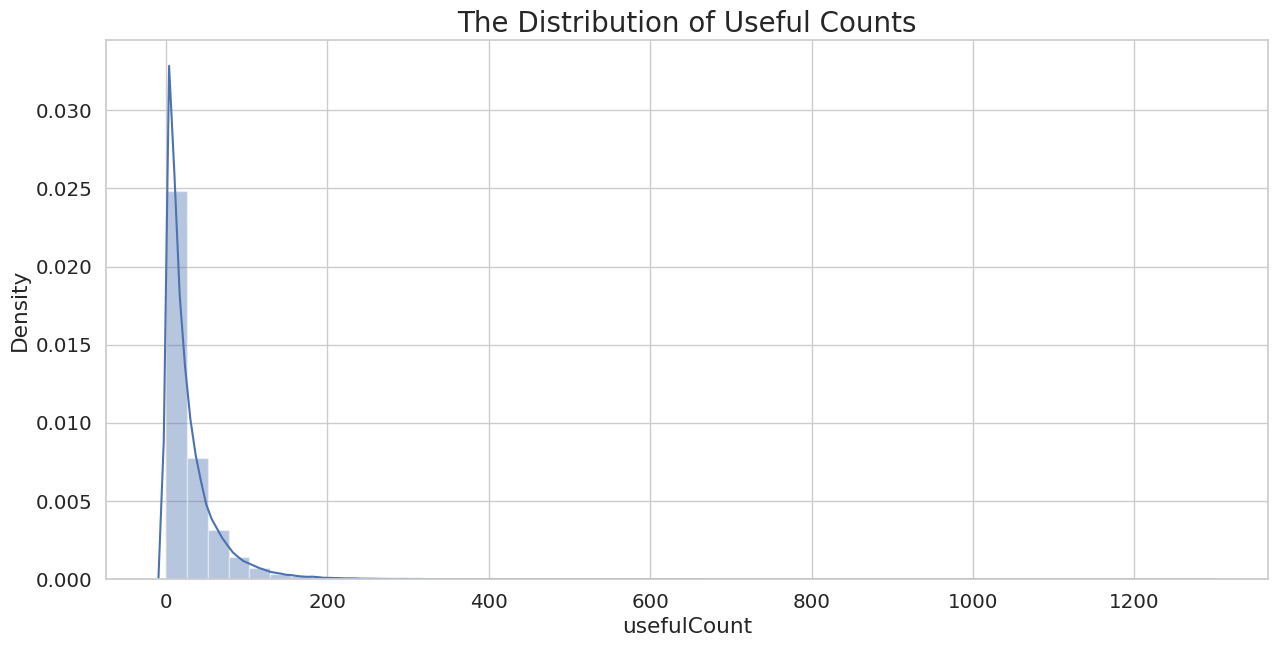

In [ ]:
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [15, 7]
sns.distplot(data['usefulCount'].dropna())
plt.title('The Distribution of Useful Counts', fontsize = 20)
plt.show()

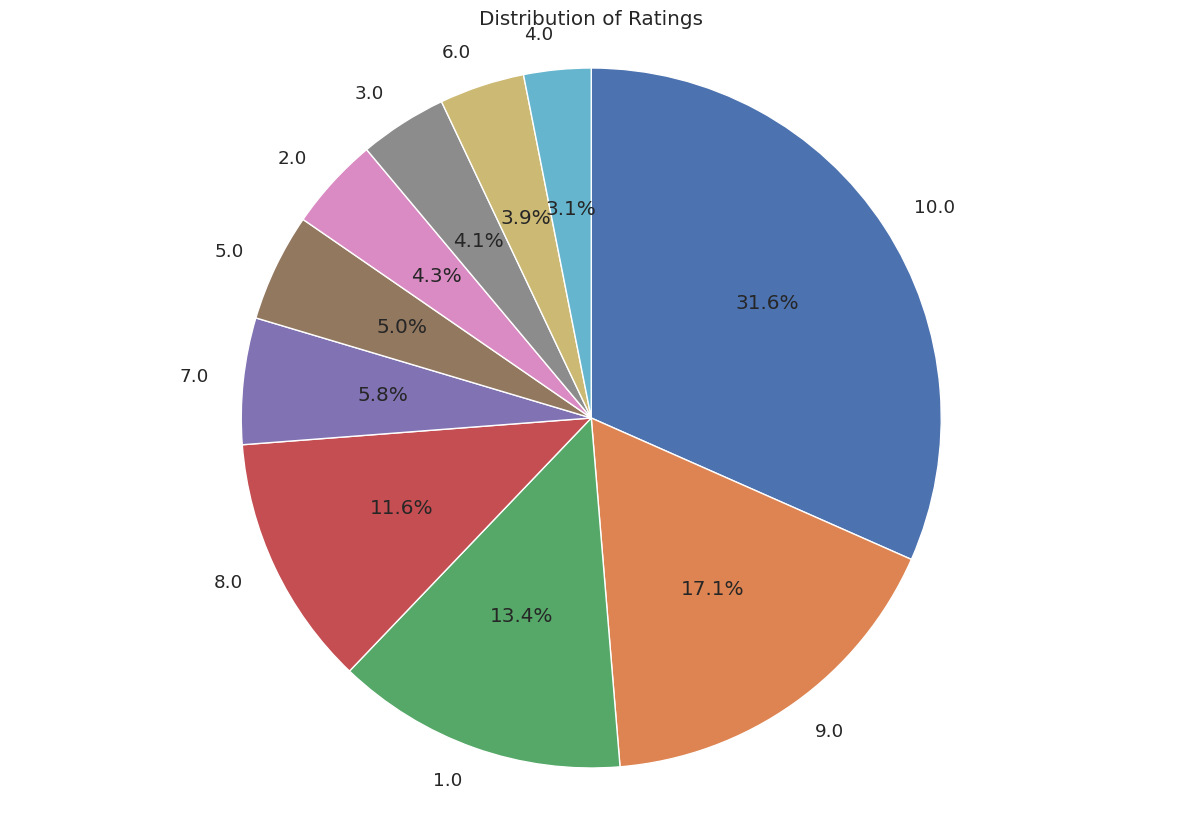

In [ ]:
# Grouping the data by rating and count the frequency of each rating
rating_counts = data.groupby('rating').size().reset_index(name='counts')

# Sort the data by the frequency of each rating
rating_counts = rating_counts.sort_values(by='counts',ascending=False)
# Plot a pie chart of the distribution of ratings
plt.figure(figsize=(15,10))
plt.pie(rating_counts['counts'], labels=rating_counts['rating'], startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

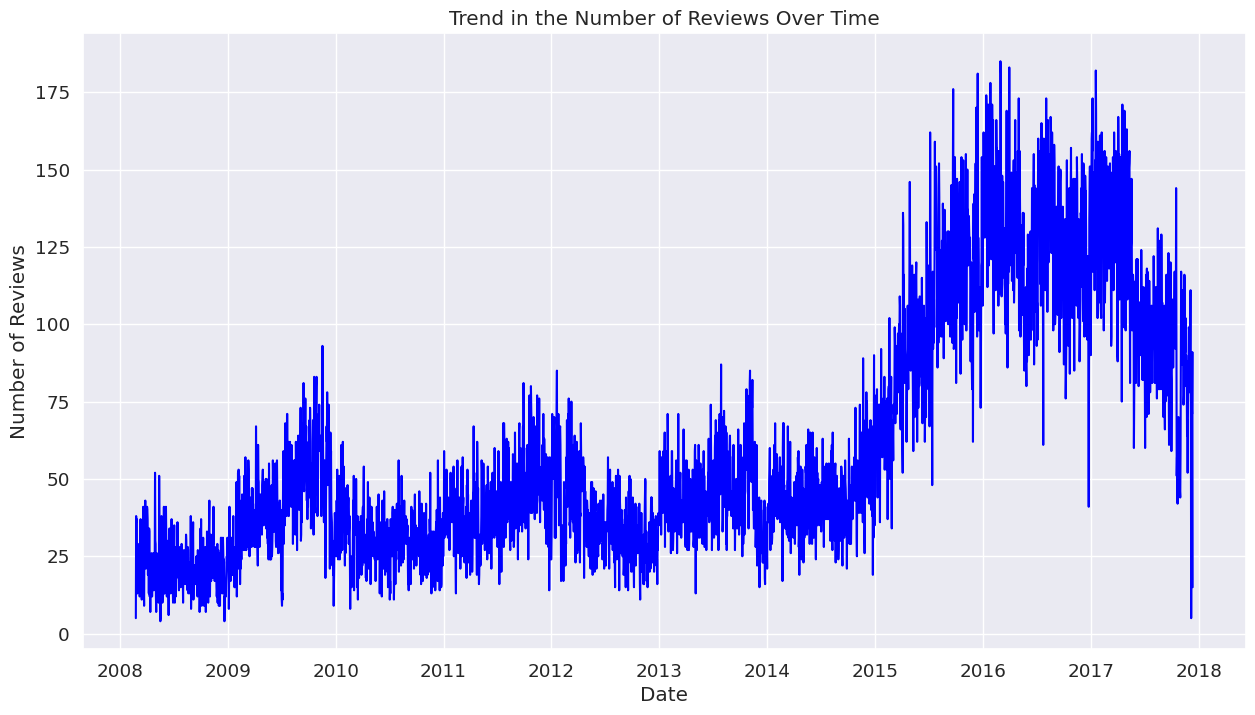

In [ ]:
# Convert the date column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = data.groupby(data['date'].dt.date).size().reset_index(name='counts')

# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

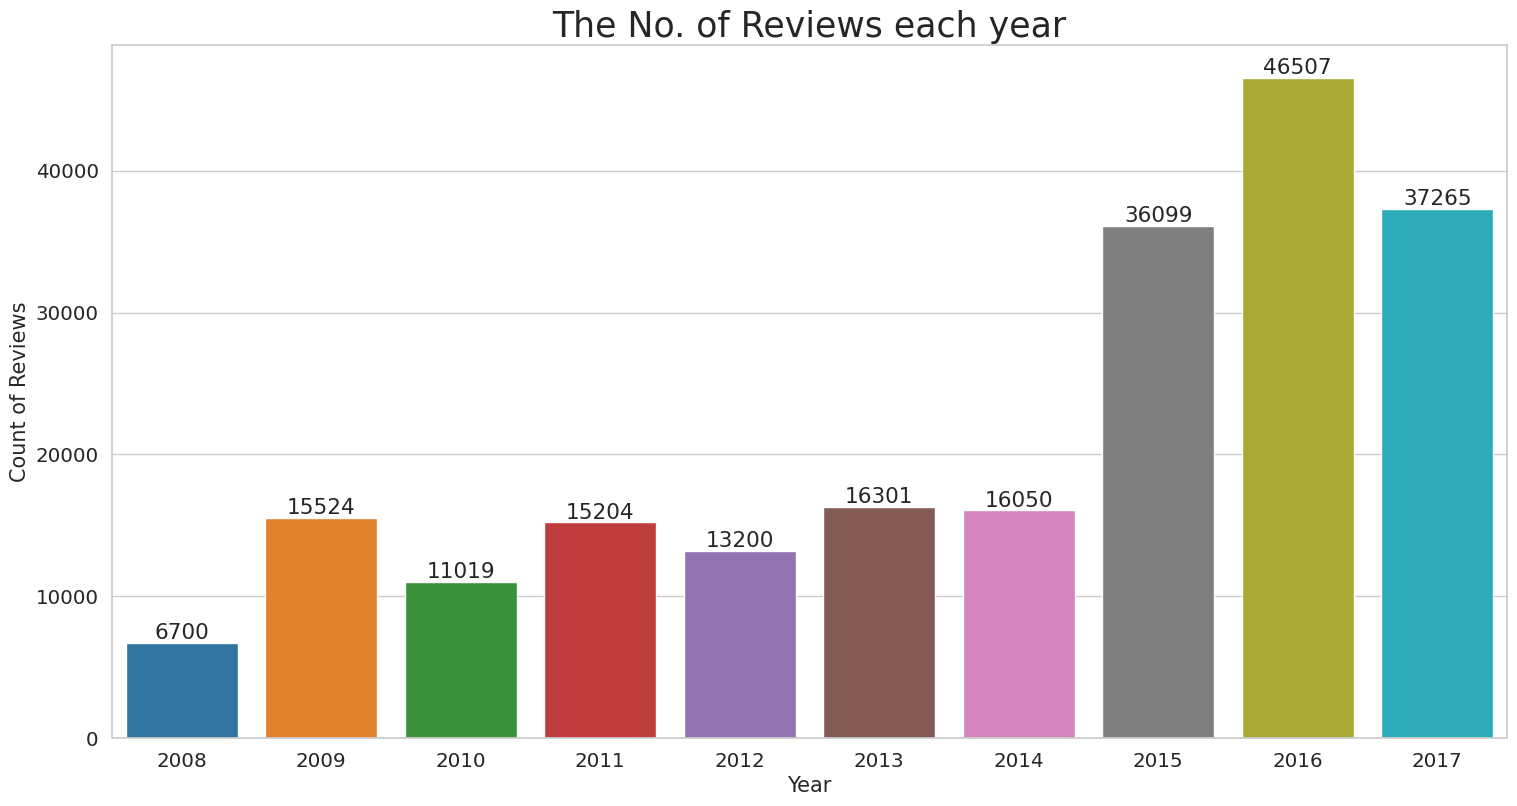

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
sns_=sns.countplot(data['Year'].to_frame(),x='Year', palette ='tab10')

for i in sns_.containers:
    sns_.bar_label(i,)

plt.title('The No. of Reviews each year', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

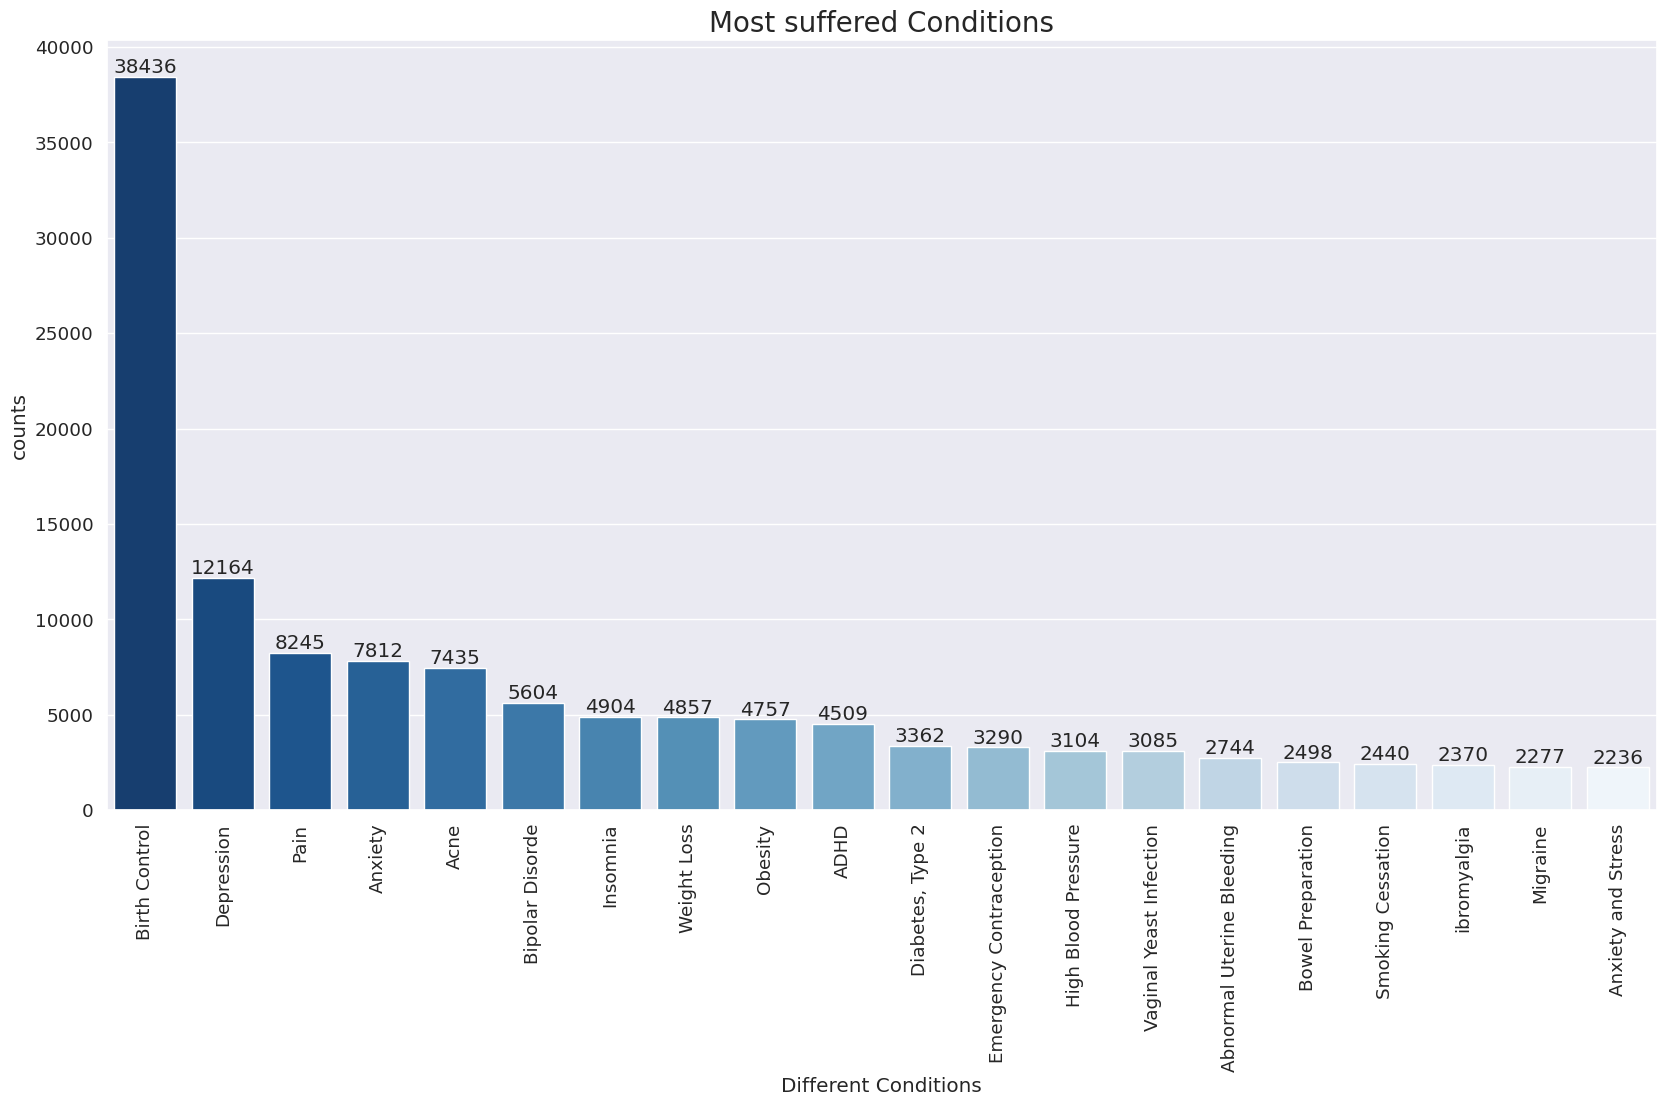

In [ ]:
common_conditions = data['condition'].value_counts().nlargest(20)

new = pd.DataFrame({'drug_class':common_conditions.index,'counts':common_conditions.values})

plt.figure(figsize=(20,10))

sns_1 = sns.barplot(data=new,x='drug_class',y='counts', palette = 'Blues_r')

for i in sns_1.containers:
    sns_1.bar_label(i,)

sns_1.set_title('Most suffered Conditions', fontsize=20)
sns_1.set_xlabel("Rating")
sns_1.set_xlabel("Different Conditions")
plt.setp(sns_1.get_xticklabels(), rotation=90)
plt.show()

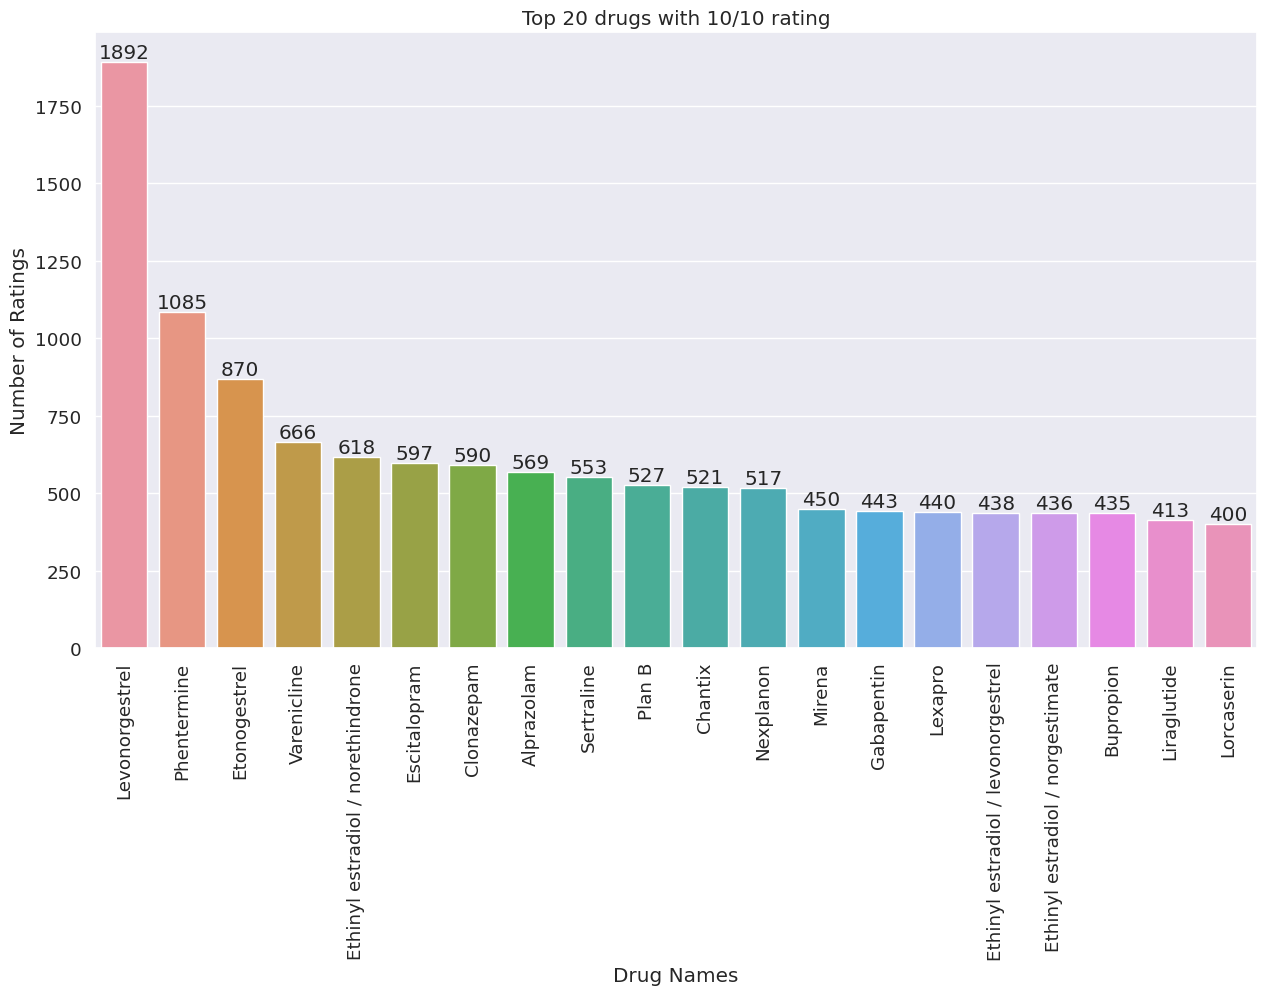

In [ ]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

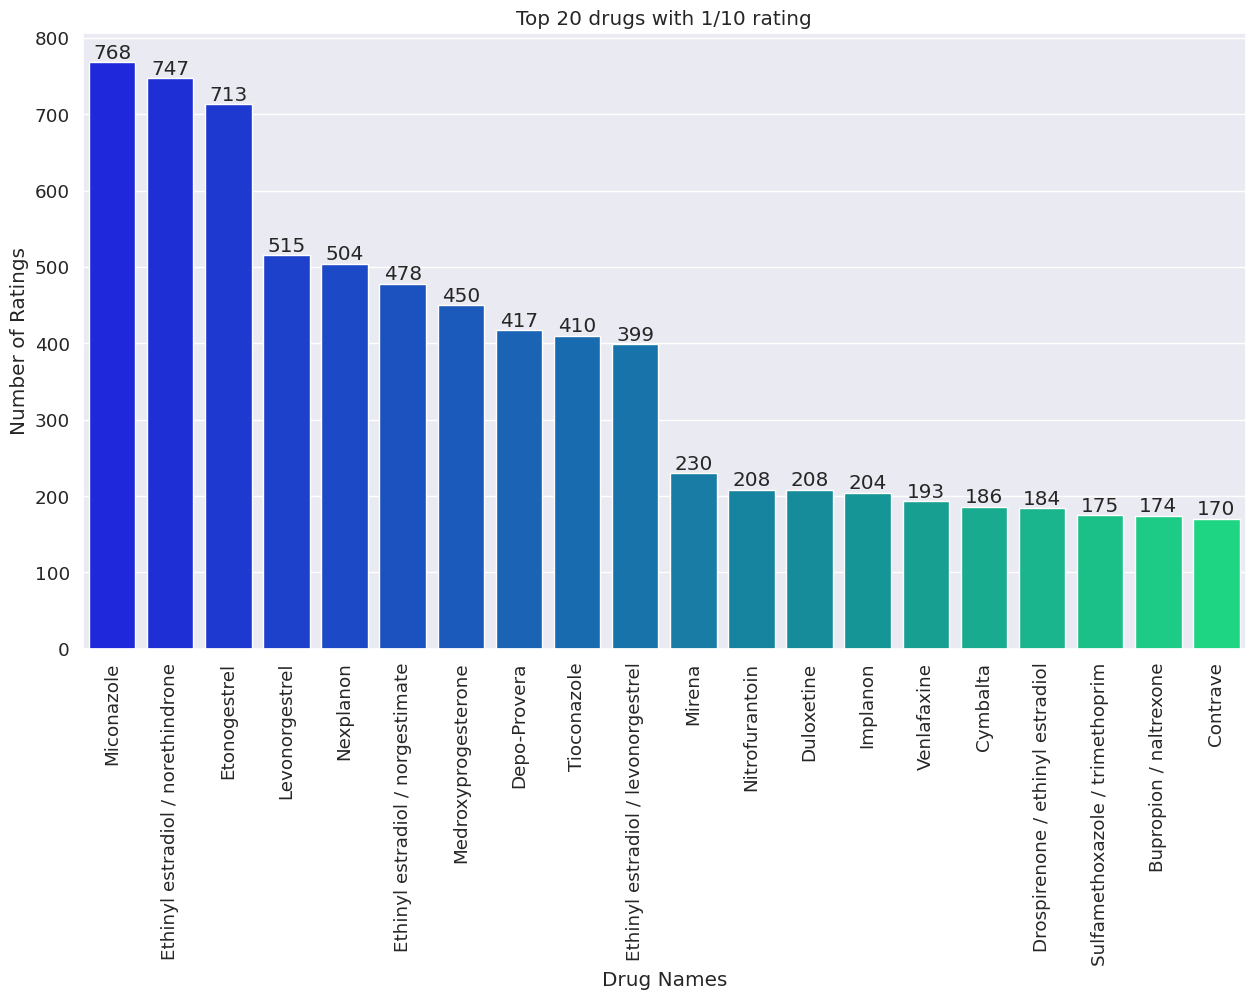

In [ ]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

for i in sns_rating.containers:
    sns_rating.bar_label(i,)

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

<Axes: xlabel='rating', ylabel='usefulCount'>

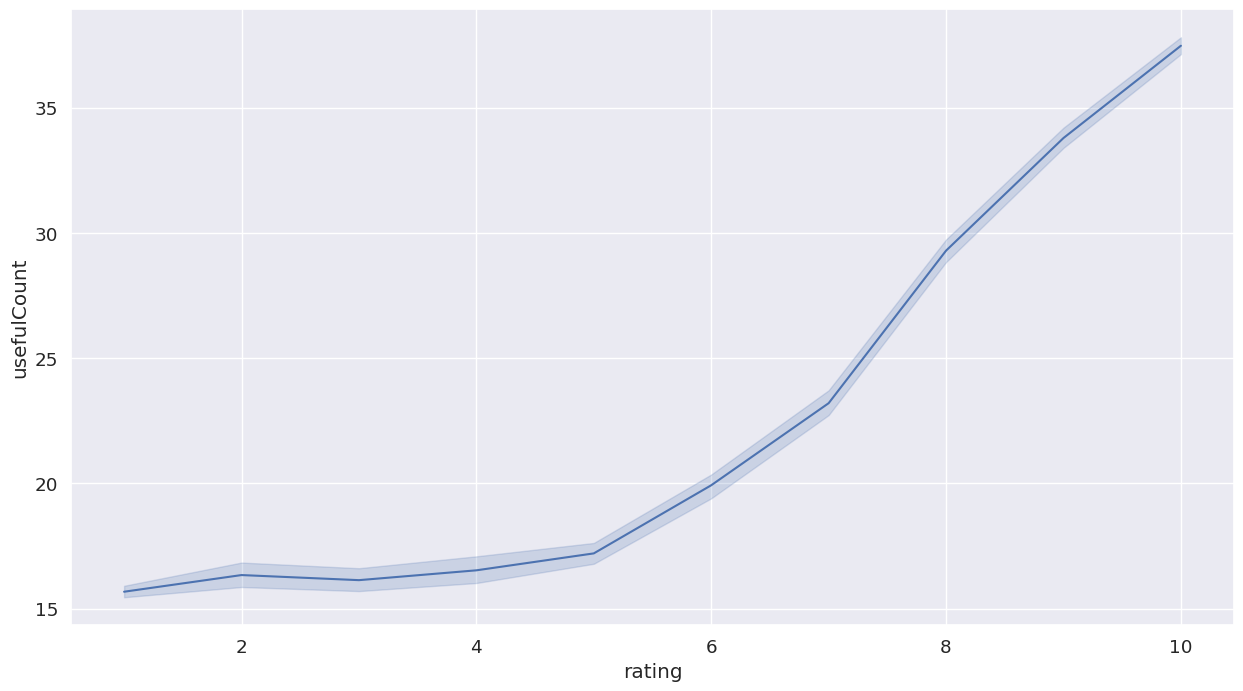

In [ ]:
sns.lineplot(data=data,x='rating',y='usefulCount')

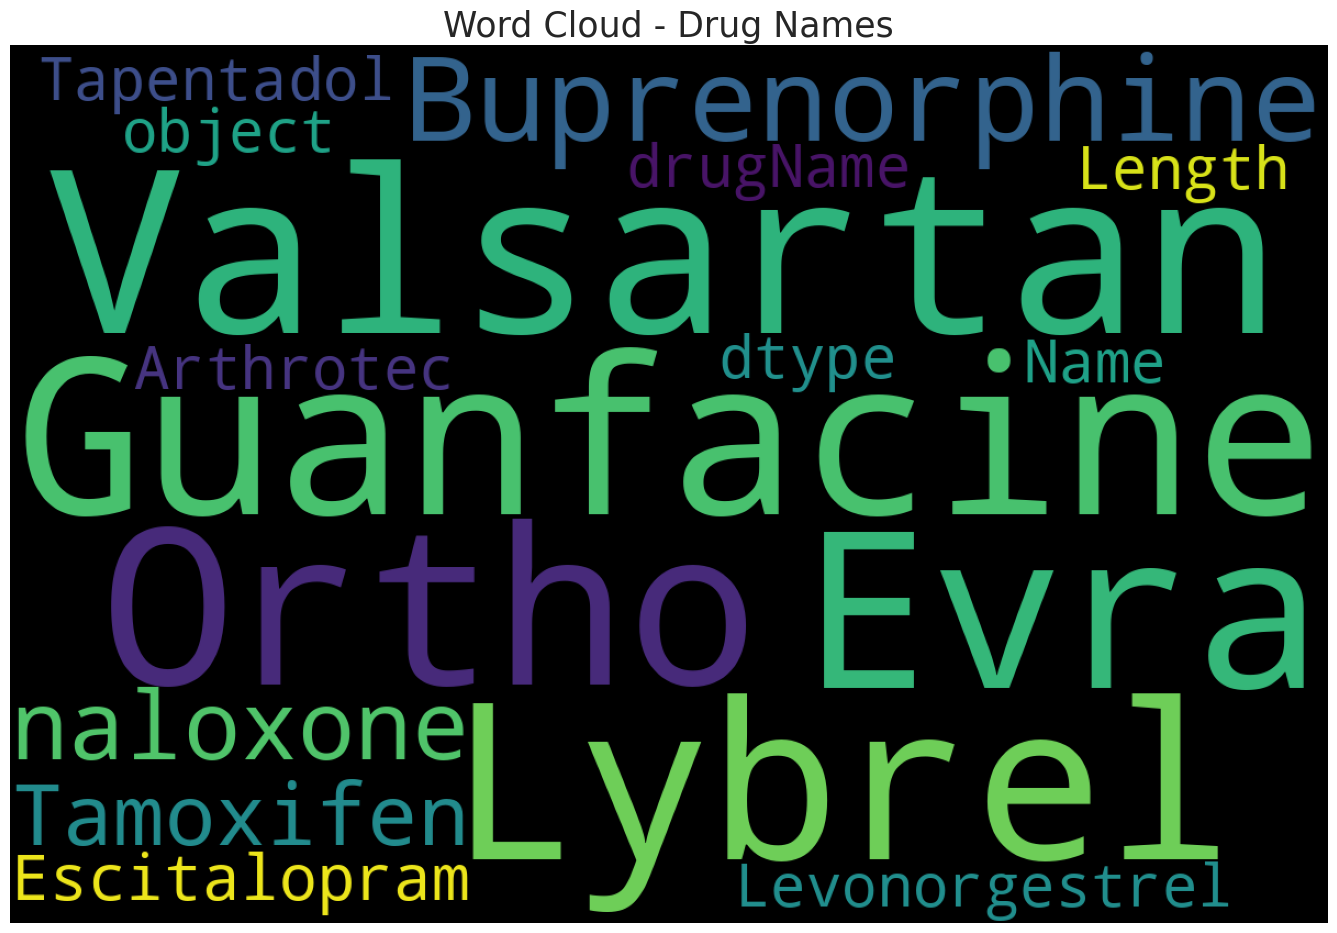

In [ ]:
# let's see the words cloud for the reviews

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

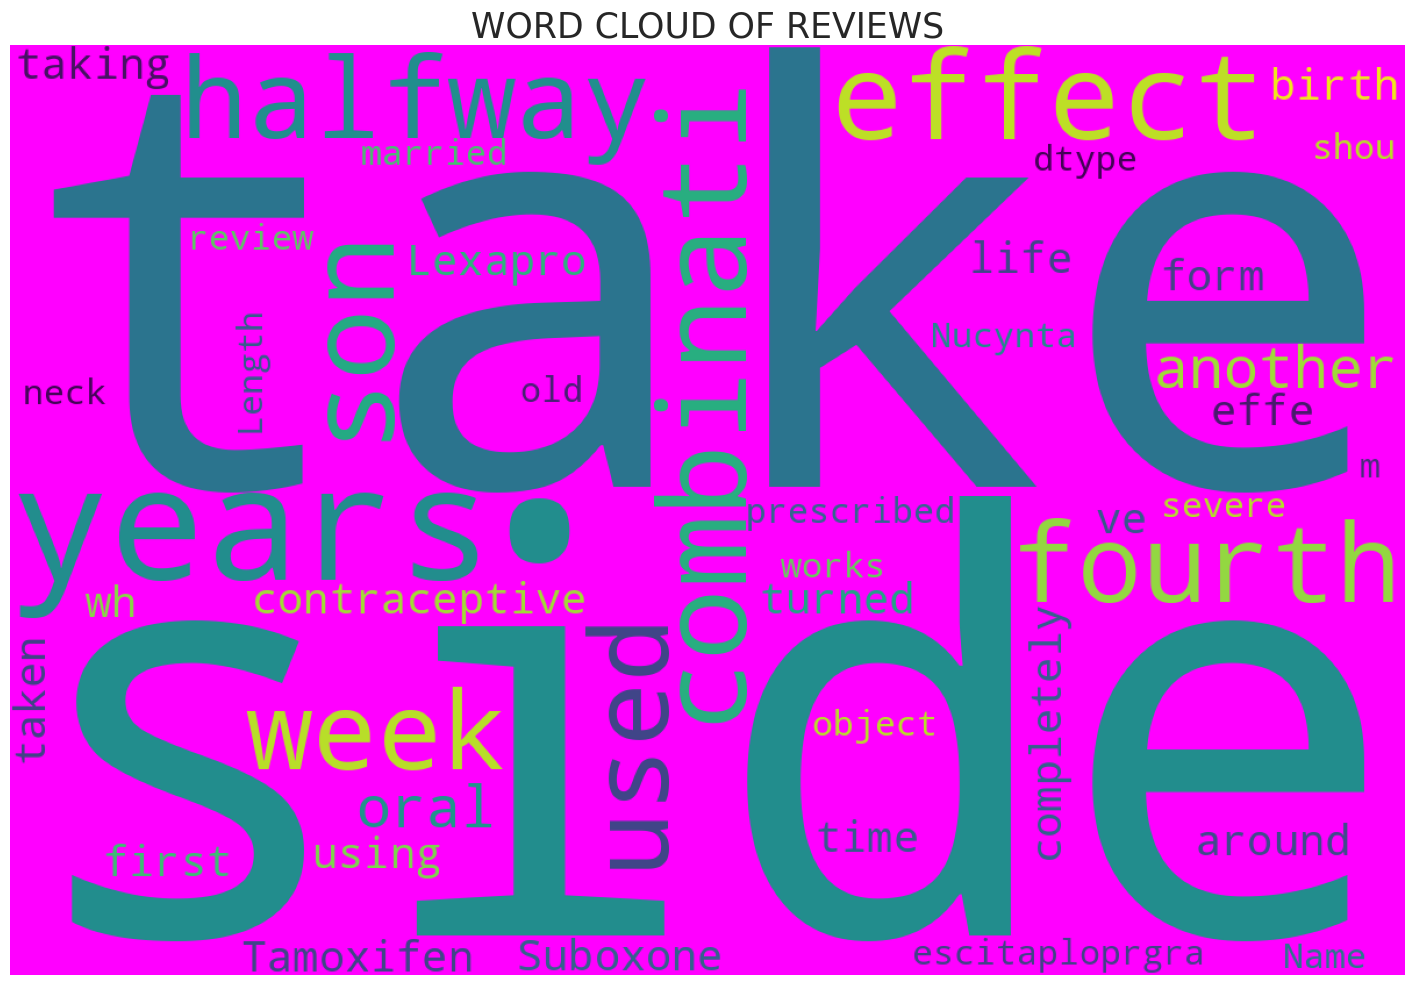

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (18, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

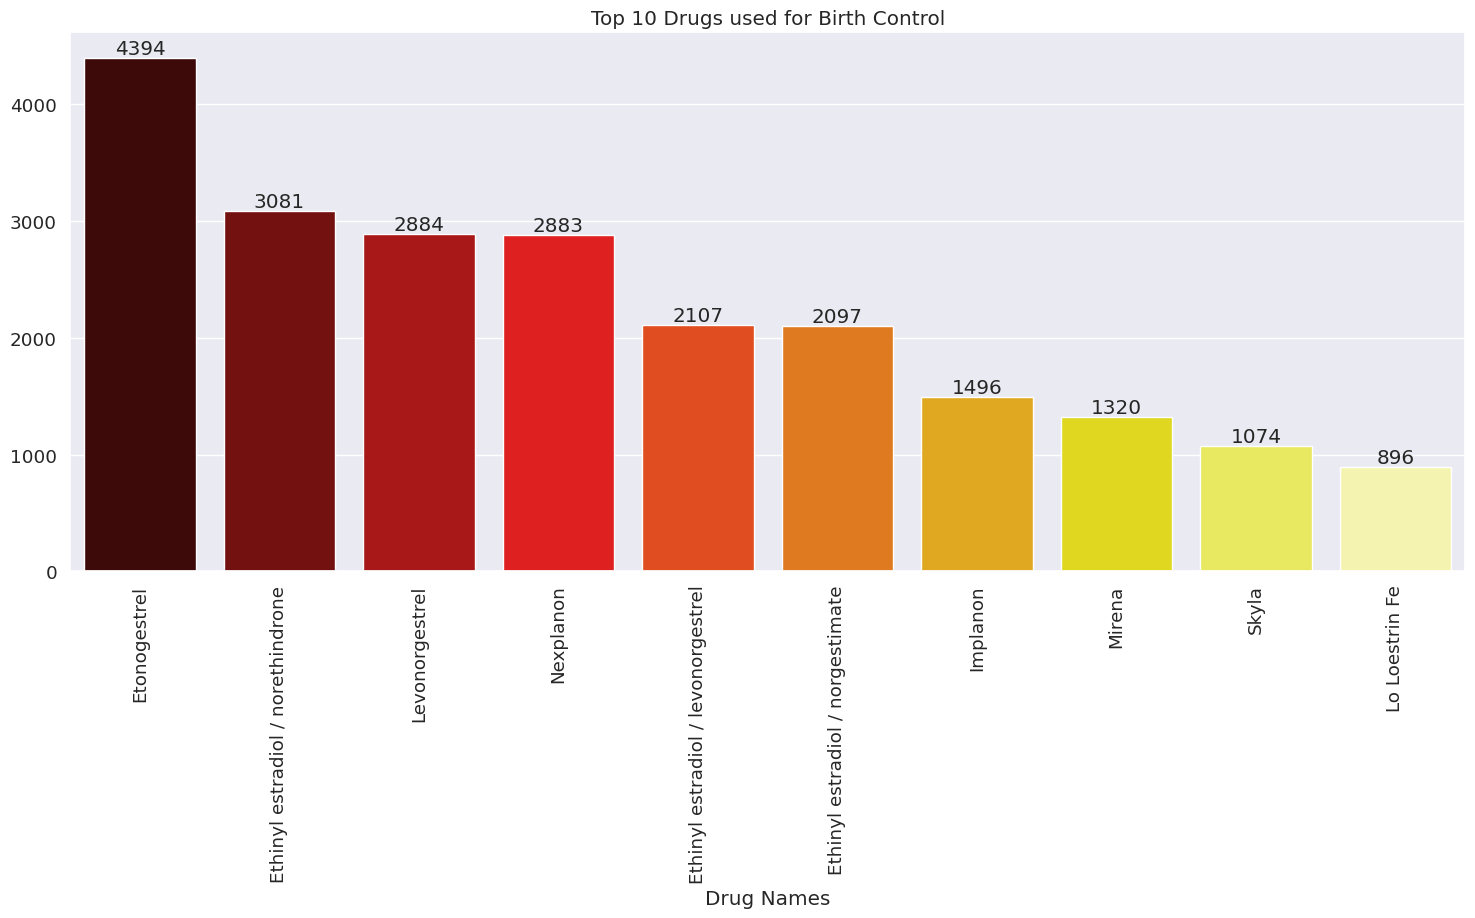

In [ ]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'hot')

for i in sns_.containers:
    sns_.bar_label(i,)

sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

# Số lần xuất hiện của những từ phổ biến trong các xếp hạng đánh giá

In [ ]:

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

from collections import defaultdict
rating_6_10 = data[data["rating"]>5]
rating_1_5 = data[data["rating"]<6]


from wordcloud import WordCloud, STOPWORDS
# Lấy Ngrams từ văn bản , với n_gram = 1 có nghĩa là mỗi phần tử là 1 từ
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Thiết lập giá trị các trục x, y
def horizontal_bar_chart(df, color):
    # Chỉ định dữ liệu đầu vào của từng trục
    trace = go.Bar(
        x=df["wordcount"].values[::-1],
        y=df["word"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Generate Bi-grams

# to map item with a default key
freq_dict = defaultdict(int)
# Tạo một tự điển lưu số lần xuất hiện của một từ trong đoạn review mà có đánh giá 1-5 sao
for sent in rating_1_5["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
# Sắp xếp theo thứ tự tần suất xuất hiện
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
# Tạo 2 cột cho từ và giá trị đếm của từ
fd_sorted.columns = ["word", "wordcount"]
# Plot the Biagram
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'orange')
# Tạo một tự điển lưu số lần xuất hiện của một từ trong đoạn review mà có đánh giá 6-10 sao
freq_dict = defaultdict(int)
for sent in rating_6_10["review"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'orange')

# Tạo 2 biểu đồ
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent biagrams of rating 1 to 5",
                                          " ",
                                          "Frequent biagrams of rating 6 to 10"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=900, width=800, paper_bgcolor='rgb(233,233,233)', title="Ngram - Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Tương quan giữa các biến dữ liệu

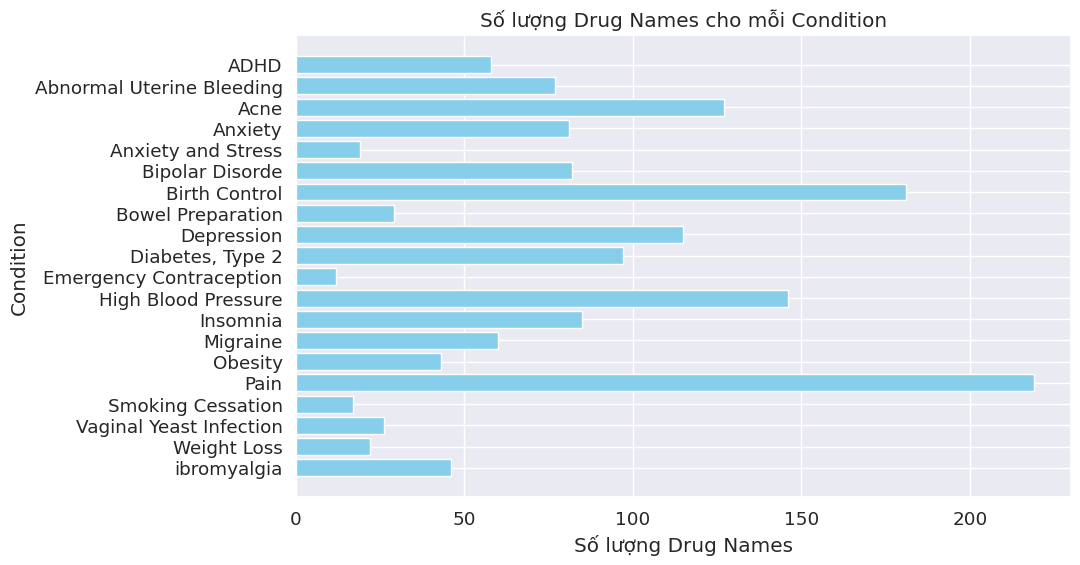

In [ ]:
# Lọc ra 20 condition phổ biến
top_20_conditions = data['condition'].value_counts().nlargest(20).index
data_filtered = data[data['condition'].isin(top_20_conditions)]

# Đếm số lượng drugName cho mỗi condition
drug_count_by_condition = data_filtered.groupby(['condition'])['drugName'].nunique().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(drug_count_by_condition['condition'], drug_count_by_condition['drugName'], color='skyblue')
plt.xlabel('Số lượng Drug Names')
plt.ylabel('Condition')
plt.title('Số lượng Drug Names cho mỗi Condition')
plt.gca().invert_yaxis()  # Đảo ngược trục y để hiển thị condition phổ biến ở phía trên
plt.show()

# Tiền xử lý dữ liệu

In [51]:
data = data.dropna()

In [52]:
# print(data['condition'].isnull.sum())
data.isnull().sum()

Unnamed: 0       0
drugName         0
condition        0
review           0
rating           0
date             0
usefulCount      0
combined_text    0
dtype: int64

In [53]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
def review_clean(review):
    # changing to lower case
    lower = review.lower()

    # Thay thế chuỗi &#039 xuất hiện nhiều lần bằng ký tự rỗng;
    pattern_remove = lower.replace("&#039;", "")

    # Xóa tất cả các ký tự đặc biệt
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')

    # Xóa các ký tự trong bảng mã ASCII
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')

    # Xóa các ký tự hoặc chuỗi ký tự khoảng trống ở đầu câu
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')

    # Xóa những ký tự khoảng cách liên tục và thay bằng 1 khoảng cách
    multiw_remove = whitespace_remove.replace(r'\s+',' ')

    # Thay 2 dấu chấm bằng 1 dấu chấm
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')


    return dataframe

In [55]:
data['review'] = data['review'].apply(review_clean)

# # Removing the stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words))

from nltk.stem.snowball import SnowballStemmer
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review'] = data['review'].apply(
    lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

data['review']

0        "it side effect, take combin bystol 5 mg fish ...
1        "mi son halfway fourth week intuniv. becam con...
2        "i use take anoth oral contraceptive, 21 pill ...
3        "this first time use form birth control. im gl...
4        "suboxon complet turn life around. feel health...
                               ...                        
53761    "i taken tamoxifen 5 years. side effect sever ...
53762    "ive take lexapro (escitaploprgram) sinc febru...
53763    "im married, 34 year old kids. take pill hassl...
53764    "i prescrib nucynta sever neck/should pain. ta...
53765                                        "it works!!!"
Name: review, Length: 213869, dtype: object

# Vecto hóa cột review

In [56]:
from textblob import TextBlob
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import string

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
data["rating"] = data["rating"].astype(int)

In [60]:
# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(data[['review', 'drugName']])

In [61]:
data['combined_text'] = data['review'] + ' ' + data['drugName']

In [62]:
reviews = vectorizer.fit_transform(data['combined_text'])

In [63]:
print(reviews)

  (0, 49469)	0.4825425733100062
  (0, 33295)	0.3924156259234513
  (0, 19791)	0.46886352652812036
  (0, 30055)	0.21841513639155835
  (0, 9739)	0.4725028184688753
  (0, 12099)	0.3179783736455423
  (0, 17168)	0.14579198741302613
  (1, 22162)	0.1913050413318828
  (1, 17172)	0.12924440218589742
  (1, 19196)	0.08631432663656546
  (1, 29404)	0.07410421833804025
  (1, 15297)	0.09090177449249195
  (1, 28964)	0.09300242507870143
  (1, 47487)	0.06465760533410077
  (1, 8200)	0.07404703111675358
  (1, 7883)	0.15844562009639568
  (1, 39390)	0.11733495998082381
  (1, 46335)	0.16120525125968205
  (1, 21751)	0.07564842621740403
  (1, 17550)	0.11683375962635056
  (1, 4809)	0.27293897838102854
  (1, 20616)	0.11006184584111113
  (1, 37290)	0.08748483562230092
  (1, 14034)	0.048899759518431445
  (1, 31008)	0.11654574070974852
  :	:
  (213866, 21805)	0.07904248340504219
  (213866, 35277)	0.07761081066615101
  (213866, 22567)	0.14587905241360333
  (213866, 35893)	0.07543091196429465
  (213866, 5873)	0.108945

In [64]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reviews, data["rating"], test_size=0.25, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
RDF_model = RandomForestClassifier()
RDF_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
import joblib

# Lưu mô hình
joblib.dump(RDF_model, '/content/RDFModel.joblib')


['/content/RDFModel.joblib']

Load model

In [ ]:
from google.colab import files

# Tải tệp lên từ Colab
files.download('/content/RDFModel.joblib')

In [ ]:
# loaded_model = joblib.load('RDFModel.joblib')

In [25]:
# from sklearn.metrics import classification_report,mean_squared_error


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = RDF_model.predict(X_test)

accuracy =  0.7426812483725774
Confusion matrix:


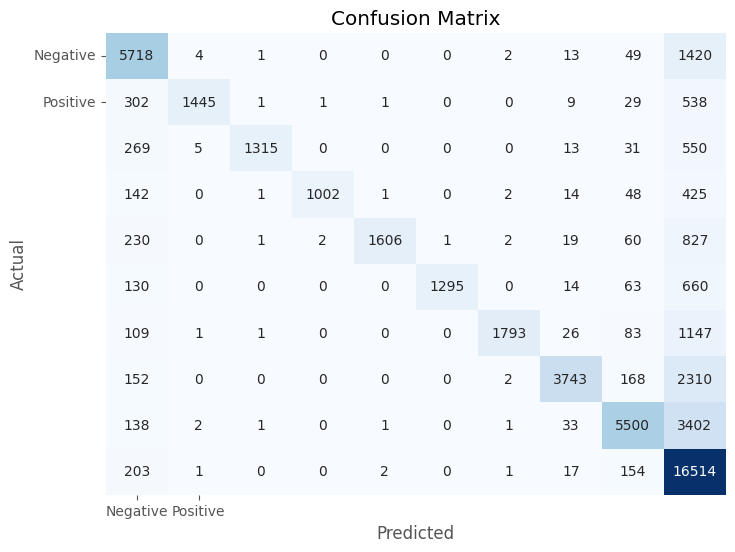

In [26]:
print('accuracy = ',accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
name = 'Mirtazapine'
review = 'This drug is bad'
# Áp dụng các bước tiền xử lý
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop_words = set(stopwords.words('english'))
Snow_ball = SnowballStemmer("english")

def review_clean(review):
    # changing to lower case
    lower = review.lower()

    # Thay thế chuỗi &#039 xuất hiện nhiều lần bằng ký tự rỗng;
    pattern_remove = lower.replace("&#039;", "")

    # Xóa tất cả các ký tự đặc biệt
    special_remove = pattern_remove.replace(r'[^\w\d\s]',' ')

    # Xóa các ký tự trong bảng mã ASCII
    ascii_remove = special_remove.replace(r'[^\x00-\x7F]+',' ')

    # Xóa các ký tự hoặc chuỗi ký tự khoảng trống ở đầu câu
    whitespace_remove = ascii_remove.replace(r'^\s+|\s+?$','')

    # Xóa những ký tự khoảng cách liên tục và thay bằng 1 khoảng cách
    multiw_remove = whitespace_remove.replace(r'\s+',' ')

    # Thay 2 dấu chấm bằng 1 dấu chấm
    dataframe = multiw_remove.replace(r'\.{2,}', ' ')


    return dataframe


review = review_clean(review)
combined_text = [review, name]  # Đây là một danh sách

# Tạo DataFrame với cột 'combined_text'
new_review = pd.DataFrame({'combined_text': [combined_text]})
# Sử dụng vectorizer để biến đổi dữ liệu
new_review_features = vectorizer.transform(new_review['combined_text'])

# Dự đoán
new_condition = RDF_model.predict(new_review_features)[0]
print("Predicted Rating:", new_condition)


AttributeError: ignored

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Lưu mô hình
joblib.dump(RDF_model, '/content/DTModel.joblib')

In [30]:
# Evaluate the model
y_pred = DT_model.predict(X_test)

accuracy =  0.6157794888963285
Confusion matrix:


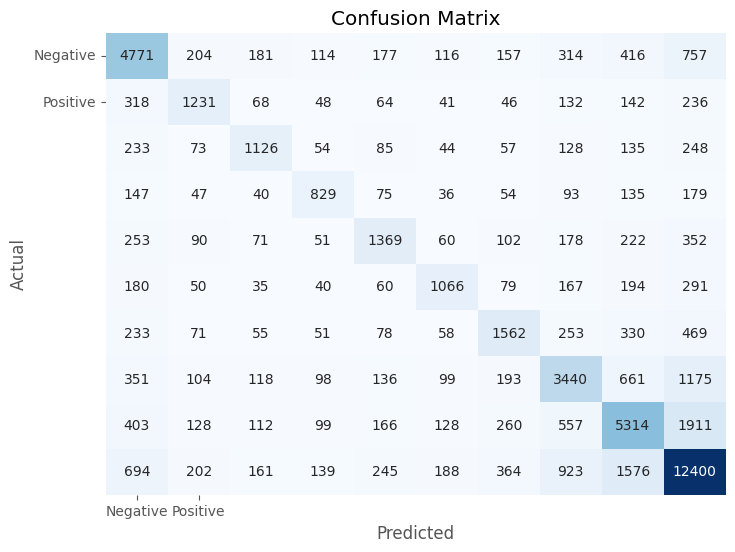

In [31]:
print('accuracy = ',accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model5.predict(new_review)[0]
print("Predicted  Rating:", new_condition)

Predicted  Rating: 10


In [ ]:
# Use the model to make predictions for new data
new_review = ["This drug is amazing, it really helped me with my condition!"]
new_review = vectorizer.transform(new_review)
new_condition = model4.predict(new_review)[0]
print("Predicted Rating:", new_condition)

Predicted Rating: 10


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Tạo một đối tượng CountVectorizer
# vectorizer = CountVectorizer()

# # Học từ điển từ tập dữ liệu
# vectorizer.fit(data['review'])

# # Đếm số lượng từ vựng
# vocab_size = len(vectorizer.vocabulary_)
# print(vocab_size)

51687


In [ ]:
max_length = max(len(sentence.split()) for sentence in data['review'])
print(max_length)

1019


In [ ]:
# Create the feature matrix
vectorizer = TfidfVectorizer()
reviews = vectorizer.fit_transform(data['review']).toarray()

In [ ]:
print(reviews.shape)

(215063, 100)


In [32]:
from sklearn import linear_model

In [33]:
ln_model = linear_model.LogisticRegression()
ln_model.fit(X_train, y_train)

LogisticRegression()

Accuracy on training set: 0.496128260290024
Accuracy on test set: 0.43512628798869174
Accuracy: 0.43512628798869174


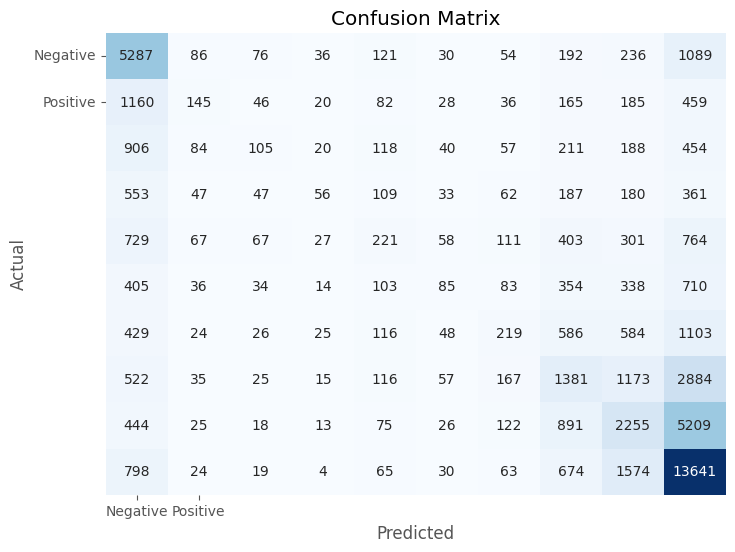

In [34]:


# Dự đoán kết quả trên tập kiểm tra
y_pred = ln_model.predict(X_test)

# Dự đoán kết quả trên tập kiểm tra
y_pred = ln_model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on training set: {}".format(ln_model.score(X_train, y_train)))
print("Accuracy on test set: {}".format(ln_model.score(X_test, y_test)))
print("Accuracy:", accuracy)
# report = classification_report(y_test, y_pred)
# print(report)

# Hiển thị ma trận nhầm lẫn bằng heatmap
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:

new_review = ["this is so good"]
new_review = vectorizer.transform(new_review)
new_condition = ln_model.predict(new_review)[0]
print("Predicted Rating:", new_condition)

In [42]:
import lightgbm as lgb
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier


In [65]:
# Creating an object for model and fitting it on training data set
LGBMC_model = LGBMClassifier()
LGBMC_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 26.142563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659728
[LightGBM] [Info] Number of data points in the train set: 160401, number of used features: 9550
[LightGBM] [Info] Start training from score -2.007301
[LightGBM] [Info] Start training from score -3.151241
[LightGBM] [Info] Start training from score -3.208956
[LightGBM] [Info] Start training from score -3.473252
[LightGBM] [Info] Start training from score -2.998110
[LightGBM] [Info] Start training from score -3.232061
[LightGBM] [Info] Start training from score -2.848523
[LightGBM] [Info] Start training from score -2.141270
[LightGBM] [Info] Start training from score -1.768485
[LightGBM] [Info] Start training from score -1.151850


LGBMClassifier()

In [66]:
# Predicting the Target variable
y_pred = LGBMC_model.predict(X_test)

accuracy =  0.4374018104286676
Confusion matrix:


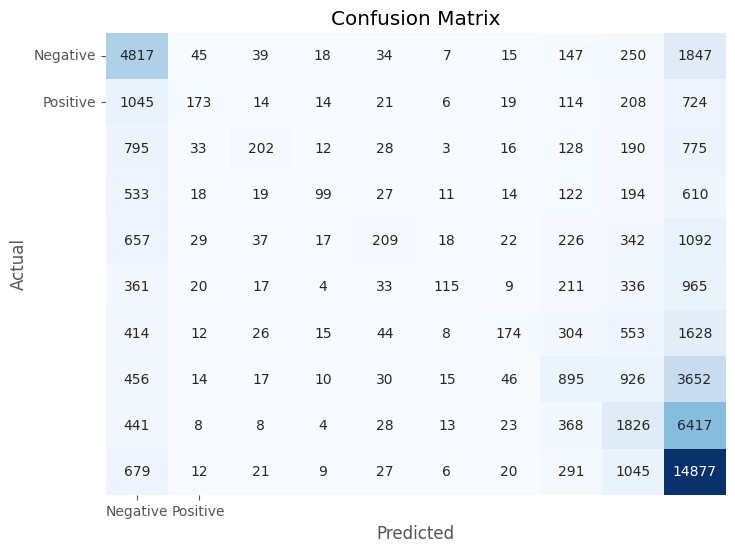

In [67]:
# making the confusion matrix
print('accuracy = ',accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
# Hiển thị ma trận nhầm lẫn bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()